In [1]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
sns.set(color_codes = True)

# Reading Image

In [3]:
image = cv2.imread('dataset/single_pred/apple_or_banana7.jfif')

image = cv2.resize(image, (120,120), interpolation = cv2.INTER_AREA)

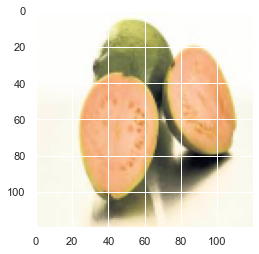

In [4]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [5]:
def edgeDetect(image):
    
    print("Original Image:")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("Grayscale: ")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    plt.imshow(gray)
    plt.show()
    
    mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
    mat_x = np.array([[ -1, 0, 1], 
                       [ 0, 0, 0], 
                       [ 1, 2, 1]])
    
    print("Filter1: ")
    filtered_image = cv2.filter2D(gray, -1, mat_y)
    plt.imshow(filtered_image, cmap='gray')
    plt.show()
    
    print("Filter2: ")
    filtered_image2 = cv2.filter2D(gray, -1, mat_x)
    plt.imshow(filtered_image2, cmap='gray')
    plt.show()
    
    print("Edges: ")
    plt.imshow(filtered_image2 - filtered_image, cmap='gray')
    plt.show()
    
    return filtered_image2 - filtered_image

In [6]:
def grayScale(image):
    
    print("Original Image:")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("Grayscale: ")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    plt.imshow(gray)
    plt.show()
    
    return gray
    
    

In [7]:
testPath = 'dataset/output/test/'
trainPath = 'dataset/output/train/'

In [8]:
testX = []
trainX = []

testY = []
trainY = []

In [9]:
fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        testX.append(cv2.imread(testPath + "/" + fruit + "/" + img))
        testY.append(fruit)
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        trainX.append(cv2.imread(trainPath + "/" + fruit + "/" + img))
        trainY.append(fruit)

Original Image:


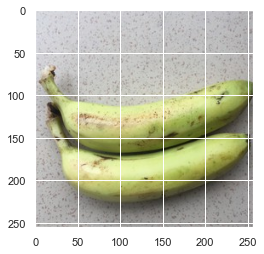

Grayscale: 


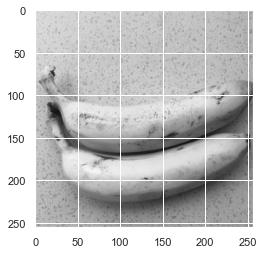

Filter1: 


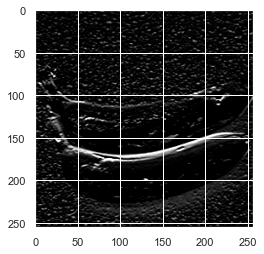

Filter2: 


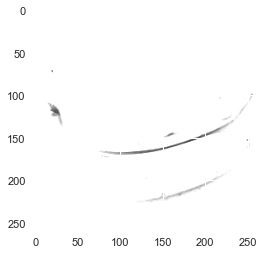

Edges: 


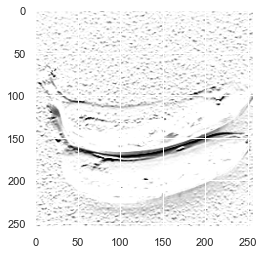

In [11]:
edges = edgeDetect(testX[600])

Original Image:


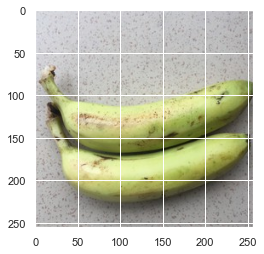

Grayscale: 


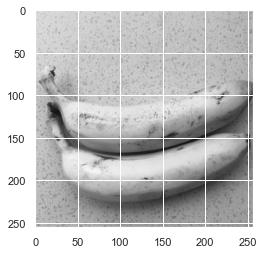

In [12]:
gray = grayScale(testX[600])

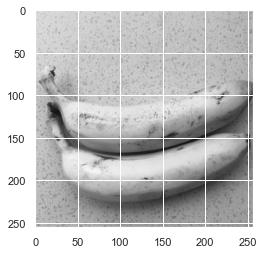

In [13]:
plt.imshow(gray)

In [14]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)

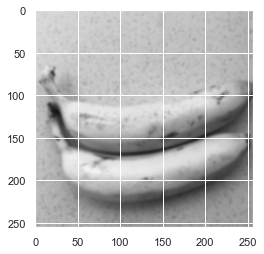

In [15]:
plt.imshow(blurred)

In [16]:
wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

Wide Edge Map


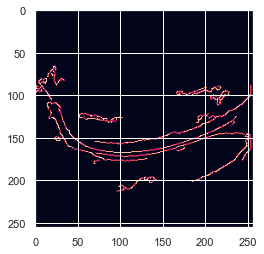

Mid Edge Map


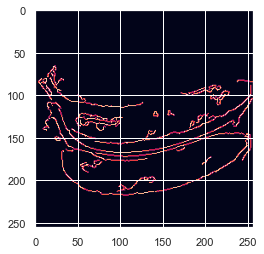

Tight Edge Map


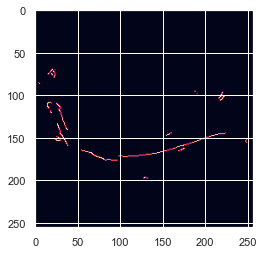

In [17]:
print("Wide Edge Map")
plt.imshow(wide)
plt.show()

print("Mid Edge Map")
plt.imshow(mid)
plt.show()

print("Tight Edge Map")
plt.imshow(tight)
plt.show()

In [18]:
gray.shape

(256, 256, 3)

In [19]:
mid.shape

(256, 256)

## masking

Original Image:


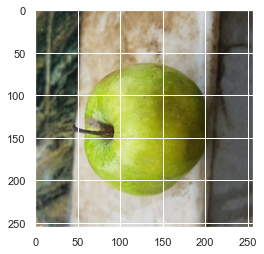

Grayscale: 


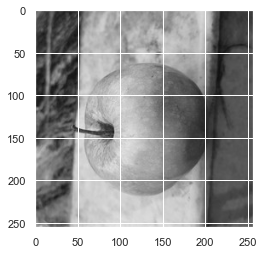

In [26]:
image = testX[20]
plt.imshow(image)
gray = grayScale(image)

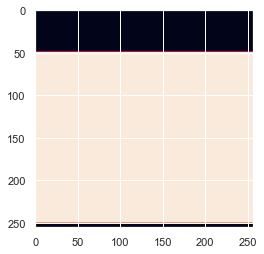

In [27]:
mask = np.zeros(gray.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 250), (300, 50), 255, -1)
plt.imshow(mask)

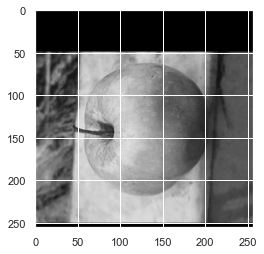

In [28]:
masked = cv2.bitwise_and(gray, gray, mask=mask)
plt.imshow(masked)

In [29]:
mask2= np.zeros(gray.shape[:2], dtype="uint8")
cv2.circle(mask2, (125, 150), 150, 255, -1)
masked2 = cv2.bitwise_and(gray, gray, mask=mask2)

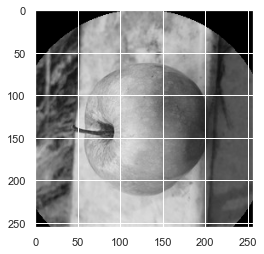

In [30]:
plt.imshow(masked2)